In [49]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# function to fetch data from yahoo finance for 1 year
def FetchData(Tickers,Period="1y",Interval='1d',Start=None,End=None,Group_by='column',Column='Adj Close'):

    """
    Return the data for tickers
    Parameters:
        tickers : str, list             List of tickers to download
        period : str             Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Either Use period parameter or use start and end
        interval : str             Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days
        start: str             Download start date string (YYYY-MM-DD) or _datetime. Default is 1900-01-01
        end: str             Download end date string (YYYY-MM-DD) or _datetime. Default is now
        group_by : str             Group by 'ticker' or 'column' (default)
    """
    StockData = yf.download(Tickers,start=Start,end=End,period=Period,interval=Interval)

    if Column!=None:
        SelectedData = StockData[Column]
    else:
        SelectedData = StockData

    return(SelectedData)



In [51]:
def Calculation(Data_Selected,Ticker):
    # calculate the log rate of return for the stocks
   
    NewDataFrame = pd.DataFrame()
    for i in Ticker:
        NewDataFrame[i]=np.log(Data_Selected[i]/Data_Selected[i].shift(1))
    
    return(NewDataFrame)

In [52]:
def ComparitiveDisplay(StockData):
    # Display the growth of stocks by setting starting price to 100
    # The graph is displayed then
    ticker_list=StockData.columns
    temp_df = pd.DataFrame()
    for i in ticker_list:
        temp_df[i]=(StockData[i]/StockData[i][0])*100
    
        
    plt.figure(figsize=(20,5))
    sns.lineplot(data=temp_df)

    return()
    

In [53]:
# Selection of the Stocks for optimization
Tickers_List = ['GE','T','PG','AMZN','CL','CVS']
StockPrice = FetchData(Tickers_List)
LogReturnRate = Calculation(StockPrice,Tickers_List)

[*********************100%***********************]  6 of 6 completed


()

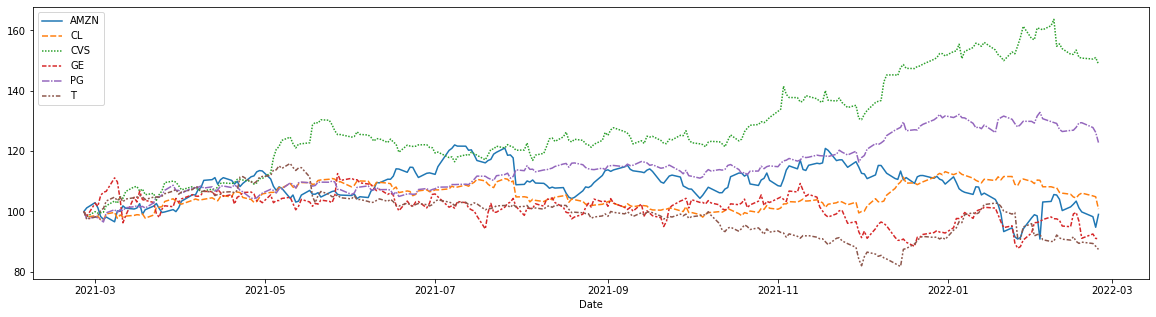

In [54]:
ComparitiveDisplay(StockPrice)

In [55]:
#Displaying the total log return for the last 1 year
ReturnRate = LogReturnRate.sum()
ReturnRate

GE     -0.094965
T      -0.134577
PG      0.205638
AMZN   -0.009861
CL      0.007862
CVS     0.397666
dtype: float64

In [56]:
Cov_Matrix = LogReturnRate.cov()
Cov_Matrix

,GE,T,PG,AMZN,CL,CVS
GE,0.000410,0.000090,0.000003,0.000056,0.000012,0.000062
T,0.000090,0.000196,0.000036,-0.000013,0.000038,0.000032
PG,0.000003,0.000036,0.000086,-0.000021,0.000065,0.000039
AMZN,0.000056,-0.000013,-0.000021,0.000353,-0.000007,-0.000003
CL,0.000012,0.000038,0.000065,-0.000007,0.000095,0.000044
CVS,0.000062,0.000032,0.000039,-0.000003,0.000044,0.000174
